In [1]:
'''
Forecast the Airlines Passengers data set. 
Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model.
Finally which model you will use for Forecasting.
'''

'\nForecast the Airlines Passengers data set. \nPrepare a document for each model explaining how many dummy variables you have created and RMSE value for each model.\nFinally which model you will use for Forecasting.\n'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from pylab import rcParams
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.formula.api as smf
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [3]:
#ls

In [4]:
data=pd.read_excel("Airlines+Data.xlsx")
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [5]:
data.shape

(96, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [7]:
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [8]:
#Missing values

data.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [9]:
data.nunique()

Month         96
Passengers    80
dtype: int64

In [10]:
data[data.duplicated()]

,Month,Passengers


In [11]:
data[data.duplicated()].shape

(0, 2)

In [12]:
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [13]:
#data["Date"] = pd.to_datetime(data.Month,format="%b-%y")
data["month"] = data.Month.dt.strftime("%b") # month extraction
data["year"] = data.Month.dt.strftime("%Y") # year extraction

In [14]:
data

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [15]:
data.rename({'Month':'Date'},axis=1,inplace=True)
data

,Date,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [16]:
#Visuliazation

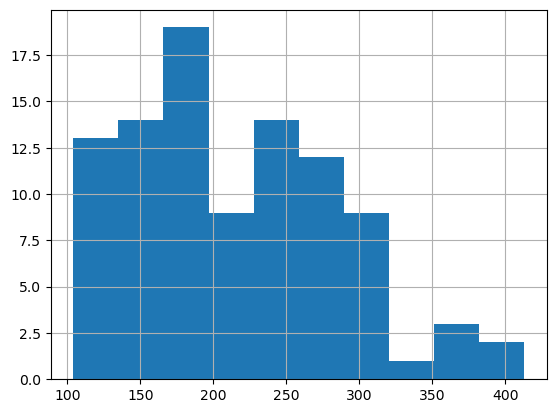

In [17]:
data['Passengers'].hist()
plt.show()

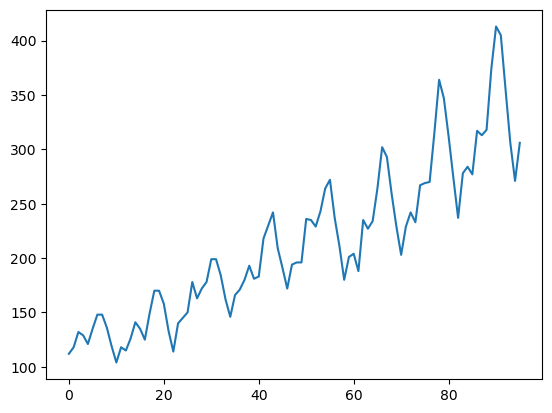

In [18]:
plt.plot(data['Passengers'])

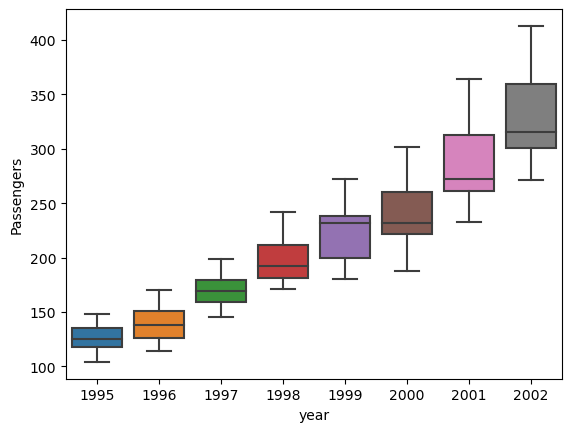

In [19]:
sns.boxplot(x ='year', y ='Passengers',data=data)
plt.show()

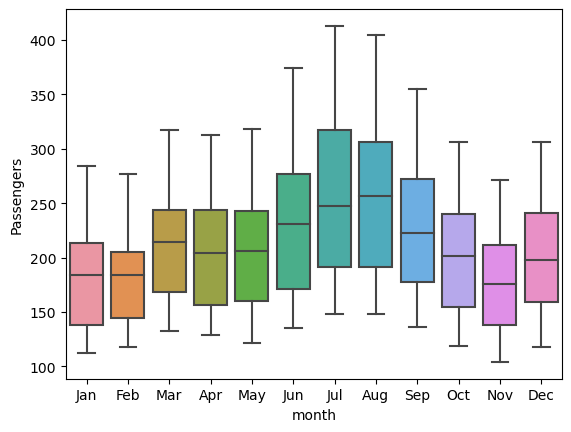

In [20]:
sns.boxplot(x ='month', y ='Passengers',data=data)
plt.show()

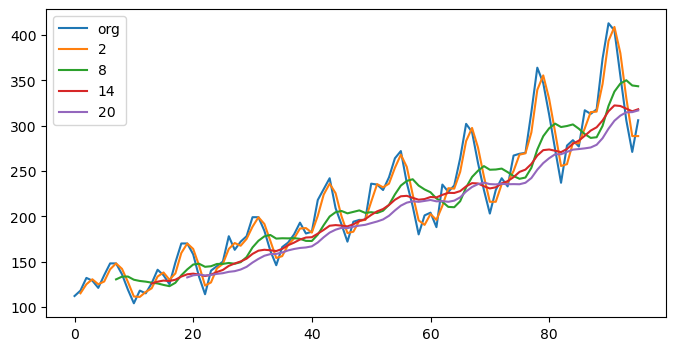

In [21]:
#Moving Average

plt.figure(figsize=(8,4))
data.Passengers.plot(label="org")
for i in range(2,24,6):
    data["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

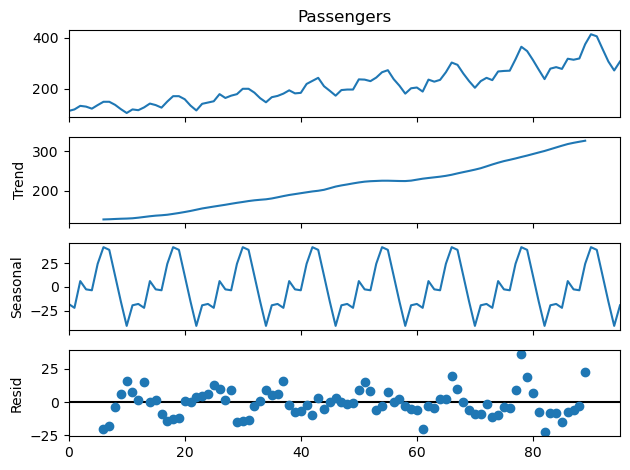

In [22]:
#Time series decomposition plot
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(data.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

#### ACF plots and PACF plots

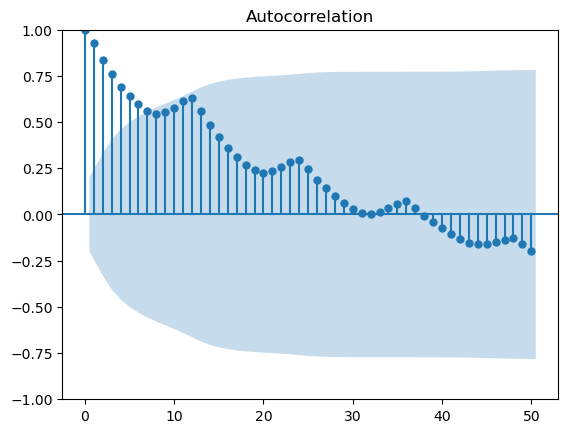

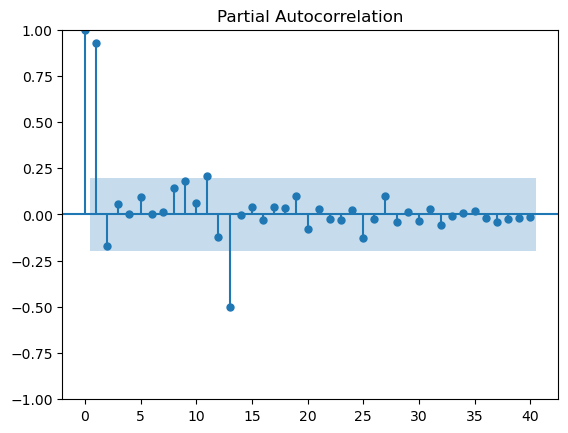

In [23]:
import statsmodels.graphics.tsaplots as tsa_plots

tsa_plots.plot_acf(data.Passengers,lags=50)
tsa_plots.plot_pacf(data.Passengers,lags=40)
plt.show()

In [24]:
data1=pd.get_dummies(data['month'])
data1

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [25]:
data1=pd.concat([data,data1],axis = 1)
data1

,Date,Passengers,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0


In [26]:
from typing_extensions import final

t= np.arange(1,97)
data1['t']= t
data1['t_square']= (t *t)
log_Passengers=np.log(data1['Passengers'])
data1['log_Passengers'] =log_Passengers
data1

,Date,Passengers,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
0,1995-01-01,112,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,2002-09-01,355,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,2002-10-01,306,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,2002-11-01,271,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


In [27]:
#Splitting Data

In [28]:
train=data1.head(70)
test=data1.tail(26)

In [29]:
train

,Date,Passengers,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
0,1995-01-01,112,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2000-06-01,264,Jun,2000,0,0,0,0,0,0,1,0,0,0,0,0,66,4356,5.575949
66,2000-07-01,302,Jul,2000,0,0,0,0,0,1,0,0,0,0,0,0,67,4489,5.710427
67,2000-08-01,293,Aug,2000,0,1,0,0,0,0,0,0,0,0,0,0,68,4624,5.680173
68,2000-09-01,259,Sep,2000,0,0,0,0,0,0,0,0,0,0,0,1,69,4761,5.556828


In [30]:
test

,Date,Passengers,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
70,2000-11-01,203,Nov,2000,0,0,0,0,0,0,0,0,0,1,0,0,71,5041,5.313206
71,2000-12-01,229,Dec,2000,0,0,1,0,0,0,0,0,0,0,0,0,72,5184,5.433722
72,2001-01-01,242,Jan,2001,0,0,0,0,1,0,0,0,0,0,0,0,73,5329,5.488938
73,2001-02-01,233,Feb,2001,0,0,0,1,0,0,0,0,0,0,0,0,74,5476,5.451038
74,2001-03-01,267,Mar,2001,0,0,0,0,0,0,0,1,0,0,0,0,75,5625,5.587249
75,2001-04-01,269,Apr,2001,1,0,0,0,0,0,0,0,0,0,0,0,76,5776,5.594711
76,2001-05-01,270,May,2001,0,0,0,0,0,0,0,0,1,0,0,0,77,5929,5.598422
77,2001-06-01,315,Jun,2001,0,0,0,0,0,0,1,0,0,0,0,0,78,6084,5.752573
78,2001-07-01,364,Jul,2001,0,0,0,0,0,1,0,0,0,0,0,0,79,6241,5.897154
79,2001-08-01,347,Aug,2001,0,1,0,0,0,0,0,0,0,0,0,0,80,6400,5.849325


In [31]:
print('Train:',train.index.min(),train.index.max(),'\n',
'Test:',test.index.min(),test.index.max())

Train: 0 69 
 Test: 70 95


### Evaluation Metric MAPE

In [32]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

#### Simple Exponential Method

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

ses_model = SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start =test.index[0],end =test.index[-1])
MAPE(pred_ses,test.Passengers) 

17.66270056573943

In [35]:
rmse_ses = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_ses))**2))
rmse_ses

72.31312952143382

#### Holt method

In [36]:
from statsmodels.tsa.holtwinters import Holt

hw_model = Holt(train["Passengers"]).fit(smoothing_level=0.8,smoothing_slope=0.2)
pred_hw = hw_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_hw,test.Passengers) 

34.726304985947955

In [37]:
rmse_hw = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_hw))**2))
rmse_hw

130.56650740782132

#### Holts winter exponential smoothing with additive seasonality and additive trend

In [38]:
#Triple Exponential
from statsmodels.tsa.holtwinters import ExponentialSmoothing

hwe_model_add_add = ExponentialSmoothing(train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_hwe_add_add,test.Passengers) 


10.305970347762699

In [39]:
rmse_hwe_add_add = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_hwe_add_add))**2))
rmse_hwe_add_add

42.759251962791986

#### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [40]:
#Triple Exponential
hwe_model_mul_add = ExponentialSmoothing(train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_hwe_mul_add,test.Passengers)

9.102313994880598

In [41]:
rmse_hwe_mul_add = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_hwe_mul_add))**2))
rmse_hwe_mul_add

34.849069803086465

In [42]:
d1= {'method':(['Simple Exponential','Holt method','Triple Exponential_add_add','Triple Exponential_mul_add']),
                     'rmse_value': ([rmse_ses,rmse_hw,rmse_hwe_add_add,rmse_hwe_mul_add])}
rmse_data = pd.DataFrame(d1)
rmse_data.sort_values('rmse_value')

,method,rmse_value
3,Triple Exponential_mul_add,34.849070
2,Triple Exponential_add_add,42.759252
0,Simple Exponential,72.313130
1,Holt method,130.566507


Triple Exponential(smoothing with multiplicative seasonality and additive trend) as good rmse score

#### Model by combining train and test

In [43]:
hwe_model_add_add = ExponentialSmoothing(data1["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()

In [44]:
#Forecasting for next 12 time periods
hwe_model_add_add.forecast(12)

96     319.235250
97     311.528363
98     350.278666
99     346.984953
100    351.844997
101    403.925669
102    440.566746
103    427.446408
104    376.628091
105    329.767424
106    296.561195
107    341.114658
dtype: float64

### Model

In [45]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

48.30985585336209

In [46]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     231.8
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           1.35e-23
Time:                        19:11:27   Log-Likelihood:                -317.88
No. Observations:                  70   AIC:                             639.8
Df Residuals:                      68   BIC:                             644.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    108.3292      5.564     19.470      0.000      97.227     119.432
t              2.0740      0.136     15.227      0.000       1.802       2.346
==============================================================================
Omnibus:                        0.276   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.871   Jarque-Bera (JB):                0.418
Skew:                           0.129   Prob(JB):                        0.811
Kurtosis:                       2.723   Cond. No.                         82.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
#Exponential

Exp = smf.ols('log_Passengers~t',data=train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

43.47847070446902

In [48]:
Exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_Passengers   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     259.9
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           6.34e-25
Time:                        19:11:28   Log-Likelihood:                 49.281
No. Observations:                  70   AIC:                            -94.56
Df Residuals:                      68   BIC:                            -90.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7584      0.029    162.181      0.000       4.700       4.817
t              0.0116      0.001     16.122      0.000       0.010       0.013
==============================================================================
Omnibus:                        1.878   Durbin-Watson:                   0.718
Prob(Omnibus):                  0.391   Jarque-Bera (JB):                1.606
Skew:                          -0.229   Prob(JB):                        0.448
Kurtosis:                       2.415   Cond. No.                         82.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_square',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

43.89814496742648

In [50]:
Quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     115.9
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           1.79e-22
Time:                        19:11:30   Log-Likelihood:                -317.49
No. Observations:                  70   AIC:                             641.0
Df Residuals:                      67   BIC:                             647.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    113.8699      8.514     13.374      0.000      96.875     130.865
t              1.6123      0.553      2.913      0.005       0.508       2.717
t_square       0.0065      0.008      0.861      0.392      -0.009       0.022
==============================================================================
Omnibus:                        0.143   Durbin-Watson:                   0.689
Prob(Omnibus):                  0.931   Jarque-Bera (JB):                0.301
Skew:                           0.085   Prob(JB):                        0.860
Kurtosis:                       2.727   Cond. No.                     6.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

124.97569951828827

In [52]:
add_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     1.573
Date:                Sat, 12 Aug 2023   Prob (F-statistic):              0.131
Time:                        19:11:31   Log-Likelihood:                -360.67
No. Observations:                  70   AIC:                             745.3
Df Residuals:                      58   BIC:                             772.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    167.2308      5.081     32.913      0.000     157.060     177.401
Jan          -10.0641     17.987     -0.560      0.578     -46.069      25.941
Feb           -7.5641     17.987     -0.421      0.676     -43.569      28.441
Mar           18.6026     17.987      1.034      0.305     -17.403      54.608
Apr           11.1026     17.987      0.617      0.539     -24.903      47.108
May           10.1026     17.987      0.562      0.577     -25.903      46.108
Jun           30.6026     17.987      1.701      0.094      -5.403      66.608
Jul           51.6026     17.987      2.869      0.006      15.597      87.608
Aug           53.4359     17.987      2.971      0.004      17.431      89.441
Sep           29.9359     17.987      1.664      0.101      -6.069      65.941
Oct            6.9359     17.987      0.386      0.701     -29.069      42.941
Nov          -24.0308     19.572     -1.228      0.224     -63.209      15.148
Dec           -3.4308     19.572     -0.175      0.861     -42.609      35.748
==============================================================================
Omnibus:                       25.132   Durbin-Watson:                   0.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                4.628
Skew:                           0.040   Prob(JB):                       0.0989
Kurtosis:                       1.743   Cond. No.                     1.41e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.83e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [53]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

30.393042895926563

In [54]:
add_sea_Quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     99.93
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           8.24e-34
Time:                        19:11:32   Log-Likelihood:                -258.29
No. Observations:                  70   AIC:                             544.6
Df Residuals:                      56   BIC:                             576.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    102.8901      3.729     27.589      0.000      95.419     110.361
t              1.8324      0.262      6.988      0.000       1.307       2.358
t_square       0.0028      0.004      0.781      0.438      -0.004       0.010
Jan           -6.3861      4.243     -1.505      0.138     -14.886       2.114
Feb           -5.8945      4.243     -1.389      0.170     -14.394       2.605
Mar           18.2582      4.243      4.303      0.000       9.758      26.758
Apr            8.7386      4.245      2.059      0.044       0.236      17.241
May            5.7134      4.247      1.345      0.184      -2.793      14.220
Jun           24.1826      4.249      5.691      0.000      15.670      32.695
Jul           43.1463      4.253     10.146      0.000      34.627      51.665
Aug           42.9376      4.257     10.087      0.000      34.410      51.465
Sep           17.3901      4.262      4.081      0.000       8.853      25.927
Oct           -7.6630      4.267     -1.796      0.078     -16.211       0.885
Nov          -28.0511      4.662     -6.017      0.000     -37.391     -18.712
Dec           -9.4819      4.665     -2.033      0.047     -18.826      -0.138
==============================================================================
Omnibus:                        3.698   Durbin-Watson:                   0.679
Prob(Omnibus):                  0.157   Jarque-Bera (JB):                2.932
Skew:                          -0.350   Prob(JB):                        0.231
Kurtosis:                       3.717   Cond. No.                     2.28e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.73e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [55]:
#Multiplicative Seasonality

Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

129.62914476526336

In [56]:
Mul_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_Passengers   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     1.482
Date:                Sat, 12 Aug 2023   Prob (F-statistic):              0.163
Time:                        19:11:34   Log-Likelihood:                 2.8839
No. Observations:                  70   AIC:                             18.23
Df Residuals:                      58   BIC:                             45.21
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7677      0.028    169.011      0.000       4.711       4.824
Jan            0.2619      0.100      2.623      0.011       0.062       0.462
Feb            0.2864      0.100      2.868      0.006       0.087       0.486
Mar            0.4322      0.100      4.328      0.000       0.232       0.632
Apr            0.3892      0.100      3.898      0.000       0.189       0.589
May            0.3773      0.100      3.778      0.000       0.177       0.577
Jun            0.4897      0.100      4.903      0.000       0.290       0.690
Jul            0.5907      0.100      5.915      0.000       0.391       0.791
Aug            0.5991      0.100      5.999      0.000       0.399       0.799
Sep            0.4918      0.100      4.925      0.000       0.292       0.692
Oct            0.3647      0.100      3.652      0.001       0.165       0.565
Nov            0.1732      0.109      1.594      0.116      -0.044       0.391
Dec            0.3114      0.109      2.865      0.006       0.094       0.529
==============================================================================
Omnibus:                       59.337   Durbin-Watson:                   0.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.310
Skew:                          -0.163   Prob(JB):                       0.0426
Kurtosis:                       1.566   Cond. No.                     1.41e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.83e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [57]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

11.724791415288038

In [58]:
Mul_Add_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_Passengers   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     144.4
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           4.76e-38
Time:                        19:11:35   Log-Likelihood:                 114.86
No. Observations:                  70   AIC:                            -203.7
Df Residuals:                      57   BIC:                            -174.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3957      0.012    376.489      0.000       4.372       4.419
t              0.0114      0.000     36.612      0.000       0.011       0.012
Jan            0.2820      0.020     13.857      0.000       0.241       0.323
Feb            0.2952      0.020     14.508      0.000       0.254       0.336
Mar            0.4295      0.020     21.113      0.000       0.389       0.470
Apr            0.3753      0.020     18.442      0.000       0.335       0.416
May            0.3520      0.020     17.289      0.000       0.311       0.393
Jun            0.4530      0.020     22.239      0.000       0.412       0.494
Jul            0.5427      0.020     26.619      0.000       0.502       0.584
Aug            0.5397      0.020     26.445      0.000       0.499       0.581
Sep            0.4211      0.020     20.604      0.000       0.380       0.462
Oct            0.2826      0.020     13.809      0.000       0.242       0.324
Nov            0.1479      0.022      6.676      0.000       0.104       0.192
Dec            0.2747      0.022     12.394      0.000       0.230       0.319
==============================================================================
Omnibus:                        5.707   Durbin-Watson:                   0.638
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                4.906
Skew:                          -0.531   Prob(JB):                       0.0860
Kurtosis:                       3.746   Cond. No.                     6.34e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.9e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [70]:
d2= {'model':(['linear_model','ex_model','qudratic_model','add_model','asq_model','multi_sea_model','mult_add_sea']),
                     'rmse_value': ([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
rmse_data = pd.DataFrame(d2)
rmse_data.sort_values('rmse_value')

,model,rmse_value
6,mult_add_sea,11.724791
4,asq_model,30.393043
1,ex_model,43.478471
2,qudratic_model,43.898145
0,linear_model,48.309856
3,add_model,124.975700
5,multi_sea_model,129.629145


RMSE score of Multiplicative Additive Seasonality is good

In [71]:
model_final = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_new = pd.Series(model_final.predict(test))
pred_new

70    219.023530
71    239.824704
72    245.158048
73    247.892750
74    274.294119
75    267.028821
76    266.263523
77    286.998225
78    308.232927
79    310.300963
80    287.035665
81    264.270367
82    246.175657
83    267.043888
84    272.444290
85    275.246050
86    301.714476
87    294.516236
88    293.817996
89    314.619756
90    335.921516
91    338.056609
92    314.858369
93    292.160128
94    274.132477
95    295.067765
dtype: float64

In [72]:
# comparing models

In [73]:
d3= {'method':(['Simple Exponential','Holt method','Triple Exponential_add_add','Triple Exponential_mul_add','linear_model','ex_model','qudratic_model','add_model','asq_model','multi_sea_model','mult_add_sea']),
                     'rmse_value': ([rmse_ses,rmse_hw,rmse_hwe_add_add,rmse_hwe_mul_add,rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
rmse_data = pd.DataFrame(d3)
rmse_data.sort_values('rmse_value')

,method,rmse_value
10,mult_add_sea,11.724791
8,asq_model,30.393043
3,Triple Exponential_mul_add,34.849070
2,Triple Exponential_add_add,42.759252
5,ex_model,43.478471
6,qudratic_model,43.898145
4,linear_model,48.309856
0,Simple Exponential,72.313130
7,add_model,124.975700
9,multi_sea_model,129.629145


In [74]:
#RMSE score of Multiplicative Additive Seasonality is good